In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, LabelEncoder
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
data = pd.read_csv(r"C:\Users\SATHVIK\OneDrive\Desktop\smartinternz\Thyroid Classification\5. project Executable Files\Data\thyroidDF.csv")
data

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
0,29,F,f,f,f,f,f,f,f,t,...,NaN,f,NaN,f,NaN,f,NaN,other,-,840801013
1,29,F,f,f,f,f,f,f,f,f,...,128.0,f,NaN,f,NaN,f,NaN,other,-,840801014
2,41,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,11.0,other,-,840801042
3,36,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,26.0,other,-,840803046
4,32,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,36.0,other,S,840803047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9167,56,M,f,f,f,f,f,f,f,f,...,64.0,t,0.83,t,77.0,f,NaN,SVI,-,870119022
9168,22,M,f,f,f,f,f,f,f,f,...,91.0,t,0.92,t,99.0,f,NaN,SVI,-,870119023
9169,69,M,f,f,f,f,f,f,f,f,...,113.0,t,1.27,t,89.0,f,NaN,SVI,I,870119025
9170,47,F,f,f,f,f,f,f,f,f,...,75.0,t,0.85,t,88.0,f,NaN,other,-,870119027


In [3]:
data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
0,29,F,f,f,f,f,f,f,f,t,...,NaN,f,NaN,f,NaN,f,NaN,other,-,840801013
1,29,F,f,f,f,f,f,f,f,f,...,128.0,f,NaN,f,NaN,f,NaN,other,-,840801014
2,41,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,11.0,other,-,840801042
3,36,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,26.0,other,-,840803046
4,32,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,36.0,other,S,840803047


In [4]:
data.isnull().sum()

age                       0
sex                     307
on_thyroxine              0
query_on_thyroxine        0
on_antithyroid_meds       0
sick                      0
pregnant                  0
thyroid_surgery           0
I131_treatment            0
query_hypothyroid         0
query_hyperthyroid        0
lithium                   0
goitre                    0
tumor                     0
hypopituitary             0
psych                     0
TSH_measured              0
TSH                     842
T3_measured               0
T3                     2604
TT4_measured              0
TT4                     442
T4U_measured              0
T4U                     809
FTI_measured              0
FTI                     802
TBG_measured              0
TBG                    8823
referral_source           0
target                    0
patient_id                0
dtype: int64

In [5]:
# Drop redundant attributes and modify the original dataframe
data.drop(['TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured', 'referral_source', 'patient_id'], axis=1, inplace=True)


In [6]:
# Remapping target values to diagnostic group
diagnoses = {
    'A': 'hyperthyroid conditions', 'B': 'hyperthyroid conditions',
    'C': 'hyperthyroid conditions', 'D': 'hyperthyroid conditions',
    'E': 'hypothyroid conditions', 'F': 'hypothyroid conditions',
    'G': 'hypothyroid conditions', 'H': 'hypothyroid conditions',
    'I': 'binding protein', 'J': 'binding protein',
    'K': 'general health', 'L': 'replacement therapy',
    'M': 'replacement therapy', 'N': 'replacement therapy',
    'O': 'antithyroid treatment', 'P': 'antithyroid treatment',
    'Q': 'antithyroid treatment', 'R': 'miscellaneous',
    'S': 'miscellaneous', 'T': 'miscellaneous'
}

In [7]:
data['target'] = data['target'].map(diagnoses)
data.dropna(subset=['target'], inplace=True)
print(data['target'].value_counts())


target
hypothyroid conditions     593
general health             436
binding protein            376
replacement therapy        336
miscellaneous              281
hyperthyroid conditions    182
antithyroid treatment       33
Name: count, dtype: int64


In [8]:
print(data[data.age > 100])

Empty DataFrame
Columns: [age, sex, on_thyroxine, query_on_thyroxine, on_antithyroid_meds, sick, pregnant, thyroid_surgery, I131_treatment, query_hypothyroid, query_hyperthyroid, lithium, goitre, tumor, hypopituitary, psych, TSH, T3, TT4, T4U, FTI, TBG, target]
Index: []

[0 rows x 23 columns]


In [9]:
# Split the data
x = data.iloc[:, 0:-1]
y = data.iloc[:, -1]

In [10]:
x

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG
4,32,F,f,f,f,f,f,f,f,f,...,f,f,f,f,NaN,NaN,NaN,NaN,NaN,36.0
18,63,F,t,f,f,t,f,f,f,f,...,f,f,f,f,68.000000,NaN,48.0,1.02,47.0,NaN
32,41,M,f,f,f,f,f,f,f,f,...,f,f,f,f,0.050000,1.6,39.0,1.00,39.0,NaN
33,71,F,t,f,f,f,f,f,f,f,...,f,f,f,f,0.050000,NaN,126.0,1.38,91.0,NaN
39,55,F,t,f,f,f,f,f,f,t,...,f,f,f,f,9.599999,2.4,136.0,1.48,92.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9153,64,M,f,f,f,f,f,f,f,f,...,f,f,f,f,0.810000,NaN,31.0,0.55,56.0,NaN
9157,60,M,f,f,t,f,f,f,f,f,...,f,f,f,f,0.180000,NaN,28.0,0.87,32.0,NaN
9158,64,M,f,f,f,f,f,f,f,t,...,f,f,f,f,NaN,NaN,44.0,0.53,83.0,NaN
9162,36,F,f,f,f,f,f,f,f,f,...,f,f,f,f,NaN,NaN,84.0,1.26,67.0,NaN


In [11]:
y

4                miscellaneous
18      hypothyroid conditions
32               miscellaneous
33             binding protein
39         replacement therapy
                 ...          
9153            general health
9157            general health
9158           binding protein
9162           binding protein
9169           binding protein
Name: target, Length: 2237, dtype: object

In [12]:
x['sex'].unique()

array(['F', 'M', nan], dtype=object)

In [13]:
x['sex'].replace(np.nan, 'F', inplace=True)

In [14]:
x['sex'].value_counts()

sex
F    1701
M     536
Name: count, dtype: int64

In [15]:
# Converting the data
x['age'] = x['age'].astype('float')
x['TSH'] = x['TSH'].astype('float')
x['T3'] = x['T3'].astype('float')
x['TT4'] = x['TT4'].astype('float')
x['T4U'] = x['T4U'].astype('float')
x['FTI'] = x['FTI'].astype('float')
x['TBG'] = x['TBG'].astype('float')

In [16]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2237 entries, 4 to 9169
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  2237 non-null   float64
 1   sex                  2237 non-null   object 
 2   on_thyroxine         2237 non-null   object 
 3   query_on_thyroxine   2237 non-null   object 
 4   on_antithyroid_meds  2237 non-null   object 
 5   sick                 2237 non-null   object 
 6   pregnant             2237 non-null   object 
 7   thyroid_surgery      2237 non-null   object 
 8   I131_treatment       2237 non-null   object 
 9   query_hypothyroid    2237 non-null   object 
 10  query_hyperthyroid   2237 non-null   object 
 11  lithium              2237 non-null   object 
 12  goitre               2237 non-null   object 
 13  tumor                2237 non-null   object 
 14  hypopituitary        2237 non-null   object 
 15  psych                2237 non-null   object

In [17]:
# Ordinal encoding for categorical features
ordinal_encoder = OrdinalEncoder(dtype='int64')
x[x.columns[1:16]] = ordinal_encoder.fit_transform(x.iloc[:, 1:16])
x.fillna(0, inplace=True)


In [18]:
# Label encoding for the target variable
label_encoder = LabelEncoder()
y = pd.DataFrame(label_encoder.fit_transform(y), columns=['target'])

In [19]:
# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)


In [20]:
# Scale the data
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [21]:
# Handling imbalanced data
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0, k_neighbors=1)
x_bal, y_bal = os.fit_resample(x_train, y_train)
x_test_bal, y_test_bal = os.fit_resample(x_test, y_test)

# Apply SMOTE only on the training set, not on the test set
# x_test_bal, y_test_bal = os.fit_resample(x_test, y_test)


In [22]:
print(y_train.value_counts())
print(x_bal)


target
4         471
2         351
1         302
6         265
5         230
3         144
0          26
Name: count, dtype: int64
[[-1.69065366 -0.56508542 -0.45692864 ... -2.42054833 -1.49123375
   3.36064931]
 [-0.21146714 -0.56508542  2.18852553 ... -0.26780448  0.16088479
  -0.18244657]
 [ 1.06369366  1.76964395 -0.45692864 ...  0.14718228 -0.13703823
  -0.18244657]
 ...
 [ 1.26771939 -0.56508542  2.18852553 ...  0.40739602  0.14468939
  -0.18244657]
 [ 0.68966814  1.76964395  2.18852553 ...  0.07800682  1.07170411
  -0.18244657]
 [ 1.05362086 -0.56508542  2.18852553 ...  0.47907369 -0.2779769
  -0.18244657]]


In [23]:
# Convert arrays to dataframes
columns = ['age', 'sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_meds', 'sick', 'pregnant', 'thyroid_surgery', 'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']
x_train_bal = pd.DataFrame(x_bal, columns=columns)
y_train_bal = pd.DataFrame(y_bal, columns=['target'])
x_test_bal = pd.DataFrame(x_test_bal, columns=columns)
y_test_bal = pd.DataFrame(y_test_bal, columns=['target'])


In [24]:
# Random Forest Classifier Model
rfr = RandomForestClassifier().fit(x_bal, y_bal.values.ravel())
y_pred = rfr.predict(x_test_bal)
print(classification_report(y_test_bal, y_pred))


              precision    recall  f1-score   support

           0       0.98      1.00      0.99       122
           1       0.89      0.89      0.89       122
           2       0.95      0.99      0.97       122
           3       0.91      0.89      0.90       122
           4       0.99      1.00      1.00       122
           5       0.96      0.95      0.95       122
           6       1.00      0.96      0.98       122

    accuracy                           0.95       854
   macro avg       0.95      0.95      0.95       854
weighted avg       0.95      0.95      0.95       854



In [25]:
print(x_bal.shape, y_bal.shape, x_test_bal.shape, y_test_bal.shape)


(3297, 22) (3297, 1) (854, 22) (854, 1)


In [26]:
from sklearn.metrics import accuracy_score
test_score=accuracy_score(y_test_bal,y_pred)

In [27]:
test_score

0.9543325526932084

In [28]:
train_score = accuracy_score(y_bal,rfr.predict(x_bal))
train_score

1.0

In [29]:
# Feature importance
from sklearn.inspection import permutation_importance
results = permutation_importance(rfr, x_bal, y_bal, scoring='accuracy')
feature_importance = ['age', 'sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_meds', 'sick', 'pregnant', 'thyroid_surgery', 'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']
importance = results.importances_mean
importance = np.sort(importance)
for i, v in enumerate(importance):
    i = feature_importance[i]
    print('Feature: {:<20} Score: {}'.format(i, v))

Feature: age                  Score: 0.0
Feature: sex                  Score: 0.0
Feature: on_thyroxine         Score: 0.0
Feature: query_on_thyroxine   Score: 0.0
Feature: on_antithyroid_meds  Score: 0.0003033060357900963
Feature: sick                 Score: 0.0003033060357900963
Feature: pregnant             Score: 0.0003033060357900963
Feature: thyroid_surgery      Score: 0.0007279344858962533
Feature: I131_treatment       Score: 0.0013345465574765125
Feature: query_hypothyroid    Score: 0.0015165301789505925
Feature: query_hyperthyroid   Score: 0.002972399150743055
Feature: lithium              Score: 0.002972399150743077
Feature: goitre               Score: 0.0032757051865332175
Feature: tumor                Score: 0.018137700940248712
Feature: hypopituitary        Score: 0.02280861389141644
Feature: psych                Score: 0.027479526842584145
Feature: TSH                  Score: 0.04683045192599333
Feature: T3                   Score: 0.07085228996057022
Feature: TT4        

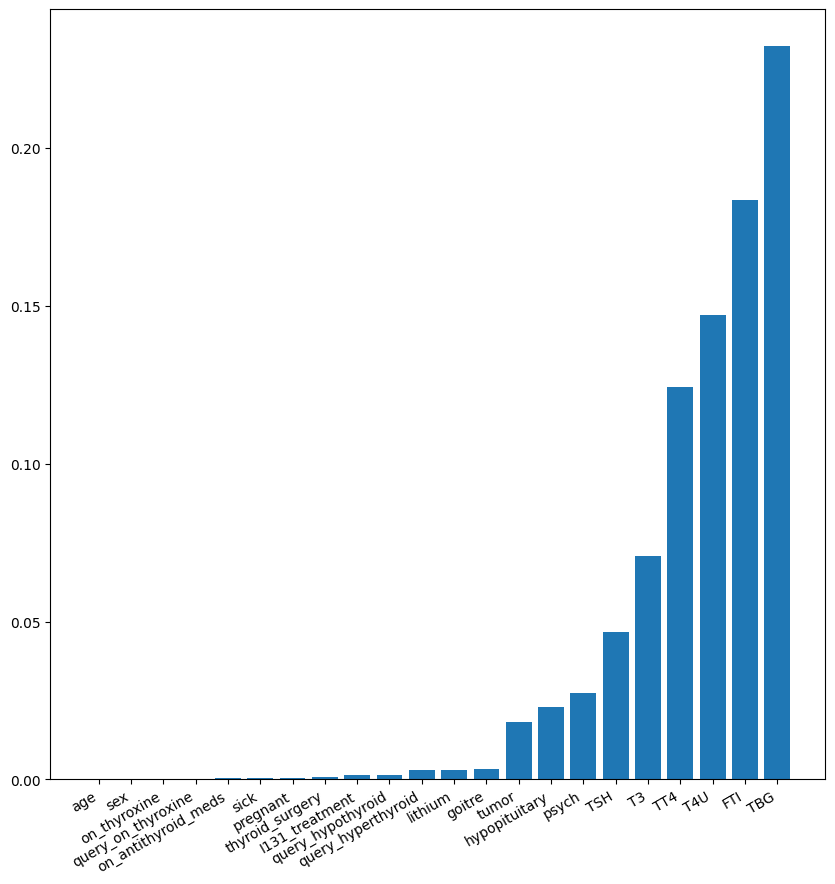

In [30]:
plt.figure(figsize=(10, 10))
plt.bar(feature_importance, importance.astype(float))
plt.xticks(rotation=30, ha='right')
plt.show()

In [31]:
x.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG
4,32.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.000000,0.0,0.0,0.00,0.0,36.0
18,63.0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,68.000000,0.0,48.0,1.02,47.0,0.0
32,41.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0.050000,1.6,39.0,1.00,39.0,0.0
33,71.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0.050000,0.0,126.0,1.38,91.0,0.0
39,55.0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,9.599999,2.4,136.0,1.48,92.0,0.0
